# Indicium - Desafio Cientista de Dados

## Importação das Bibliotecas

In [3]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

In [4]:
# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Pacotes de modelagem
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

## Importação da base de dados

In [7]:
df = pd.read_csv('desafio_indicium_imdb.csv', sep=',')

In [8]:
df.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


## Preparação dos Dados

### Missing Values

In [11]:
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Há 101 dados faltantes na coluna "Certificate", 157 dados faltantes na coluna "Meta_score" e 169 dados faltantes na coluna "Gross". É sempre muito importante alinhar com os analistas de negócio como tratar esses missing values. Para que as nossas análises e modelos não sejam prejudicados, iremos eliminar da nossa base de dados as linhas com dados faltantes.

#### Eliminando os valores missing

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### Duplicações

In [17]:
df.duplicated().sum()

0

Não há valores duplicados na nossa base de dados

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     713 non-null    int64  
 1   Series_Title   713 non-null    object 
 2   Released_Year  713 non-null    object 
 3   Certificate    713 non-null    object 
 4   Runtime        713 non-null    object 
 5   Genre          713 non-null    object 
 6   IMDB_Rating    713 non-null    float64
 7   Overview       713 non-null    object 
 8   Meta_score     713 non-null    float64
 9   Director       713 non-null    object 
 10  Star1          713 non-null    object 
 11  Star2          713 non-null    object 
 12  Star3          713 non-null    object 
 13  Star4          713 non-null    object 
 14  No_of_Votes    713 non-null    int64  
 15  Gross          713 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 94.7+ KB


### Transformação de Variáveis

A coluna "Runtime" está classificada como object, mas queremos tratá-la como número inteiro. Iremos retirar a palavra "min" das linhas desta coluna e iremos convertê-la para sendo como do tipo int64. 

A coluna "Gross" está classificada como object, mas queremos tratá-la como número decimal. Assim, iremos convertê-la para sendo como do tipo float64. 

Nota-se que a coluna "Genre" apresenta, em algumas linhas, diversos gêneros para o mesmo filme. Iremos criar uma nova coluna, nomeada de "Genre_New" com apenas o primeiro gênero que aparece em cada linha. Partiremos do pressuposto que esse será o gênero dominante do filme. Essa nova coluna será importante para avaliarmos o poder de separação desta variável qualitativa com outras variáveis da nossa base de dados

#### Removendo a palavra "min" das linhas da coluna "Runtime"

In [23]:
df['Runtime'] = df['Runtime'].str.replace('min', '')

#### Convertendo a coluna "Runtime" para o tipo int64

In [25]:
df['Runtime'] = df['Runtime'].astype('int64')

In [26]:
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#### Convertendo a coluna "Gross" para o tipo float64

In [28]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [29]:
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

#### Criando a nova coluna "Genre_New" com apenas o primeiro gênero de cada filme

In [31]:
# Função para extrair a primeira palavra do texto que está separado por vírgulas
def extrair_primeira_palavra(texto_com_virgulas):
    texto = texto_com_virgulas.split(',')
    return texto[0] if len(texto) > 0 else ''

# Aplicando a função à coluna e criando uma nova coluna no DataFrame
df['Genre_New'] = df['Genre'].apply(extrair_primeira_palavra)

df.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_New
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action


## Análises de Correlações e Associações

### Análises de Correlações entre variáveis quantitativas

C:\Users\mateu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mateu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mateu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mateu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

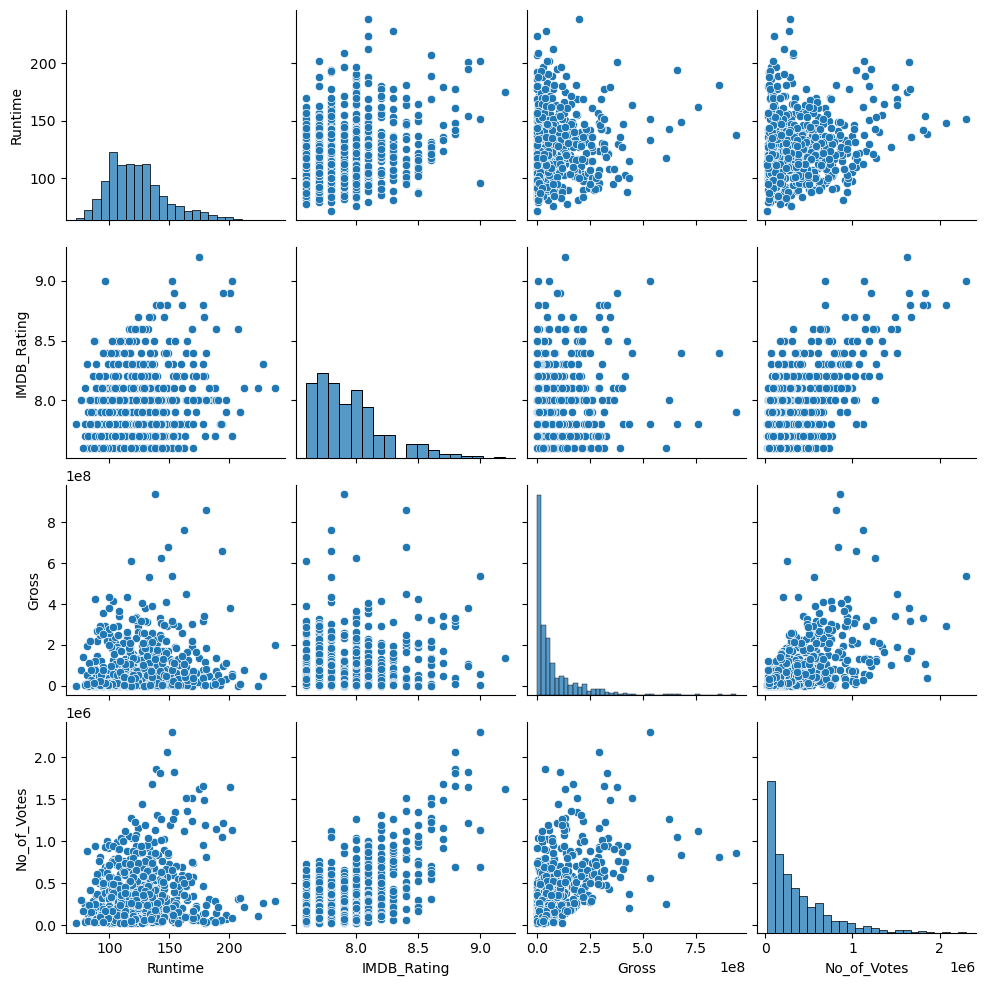

In [34]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df[['Runtime', 'IMDB_Rating','Gross','No_of_Votes']]);

#### Correlação entre Runtime e IMDB_Rating

In [36]:
correlacao = round(df['Runtime'].corr(df['IMDB_Rating']),2)

print(f"A correlação entre Runtime e IMDB_Rating é: {correlacao}")

A correlação entre Runtime e IMDB_Rating é: 0.26


A correlação entre as Runtime e IMDB_Rating foi fraca, o que sinaliza que a duração do filme não impacta muito na nota recebida pelo filme.

#### Correlação entre Runtime e Gross

In [39]:
correlacao = round(df['Runtime'].corr(df['Gross']),2)

print(f"A correlação entre Runtime e Gross é: {correlacao}")

A correlação entre Runtime e Gross é: 0.17


A correlação entre as Runtime e Gross foi fraca, o que sinaliza que a duração do filme não impacta muito no faturamento obtido pelo filme.

#### Correlação entre Runtime e No_of_Votes

In [42]:
correlacao = round(df['Runtime'].corr(df['No_of_Votes']),2)

print(f"A correlação entre Runtime e No_of_Votes é: {correlacao}")

A correlação entre Runtime e No_of_Votes é: 0.21


A correlação entre as Runtime e No_of_Votes foi fraca, o que sinaliza que a duração do filme não impacta muito na quantidade de votos que o filme recebeu.

#### Correlação entre Gross e IMDB_Rating

In [45]:
correlacao = round(df['Gross'].corr(df['IMDB_Rating']),2)

print(f"A correlação entre Gross e IMDB_Rating é: {correlacao}")

A correlação entre Gross e IMDB_Rating é: 0.13


A correlação entre Gross e IMDB_Rating foi fraca, o que sinaliza que o faturamento obtido pelo filme impacta pouco na nota recebida pelo filme.
    
O filme pode gerar um faturamento alto, mas isso não implica que ele receberá uma boa avaliação.

#### Correlação entre Gross e No_of_Votes

In [48]:
correlacao = round(df['Gross'].corr(df['No_of_Votes']),2)

print(f"A correlação entre Gross e No_of_Votes é: {correlacao}")

A correlação entre Gross e No_of_Votes é: 0.56


A correlação entre Gross e No_of_Votes foi muito mais alta que a correlação entre Gross e IMDB_Rating.

Ou seja, filmes que geram muito faturamento são assistidos por muitas pessoas. Esses tipo de filme leva muitas pessoas a votarem no IMDB. Mas muitos desses votos apresentam avaliações baixas.

#### Correlação entre IMDB_Rating e No_of_Votes

In [51]:
correlacao = round(df['IMDB_Rating'].corr(df['No_of_Votes']),2)

print(f"A correlação entre IMDB_Rating e No_of_Votes é: {correlacao}")

A correlação entre IMDB_Rating e No_of_Votes é: 0.61


A correlação entre IMDB_Rating e No_of_Votes pode ser classificada como próxima de forte. Foi a mais alta das correlações entre as variáveis quantitativas.

Ela demonstra que filmes que possuem mais votos podem tender a ter uma nota mais alta no IMDB.

### Análises de Associações entre variáveis qualitativas

Iremos analisar a associação de variáveis qualitativas da nossa base de dados. 

Para isso, iremos utilizar o IV (Information Value) que é uma medida capaz de nos passsar o poder de separação de uma variável qualitativa em relação a outra variável de duas categorias (variável binária).

Iremos criar uma variável binária com base na nota recebida pelo filme. Ou seja, com base na coluna "IMDB_Rating". Essa variável será nomeada como "IDB_Classification". 

O critério para essa variável binária será o seguinte: Filmes que tiverem notas posicionadas acima do 3º quartil irão receber a classificação 1. Filmes que não tiverem notas posicionadas acima do 3º Quartil receberão a classificação 0.

Também iremos criar uma variável binária com base no faturamento do filme. Ou seja, com base na coluna "Gross". Essa variável será nomeada como "Gross_Classification". 

O critério para essa variável binária será o seguinte: Filmes que tiverem o faturamento posicionado acima do 3º quartil irão receber a classificação 1. Filmes que não tiverem o faturamento posicionado acima do 3º Quartil receberão a classificação 0.

In [55]:
df.describe()

,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,713.000000,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02
mean,519.300140,123.690042,7.935203,77.154278,3.533480e+05,7.858395e+07
std,295.416331,25.896632,0.288999,12.409392,3.462212e+05,1.150433e+08
min,1.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,263.000000,104.000000,7.700000,70.000000,9.582600e+04,6.153939e+06
50%,527.000000,120.000000,7.900000,78.000000,2.363110e+05,3.500000e+07
75%,778.000000,136.000000,8.100000,86.000000,5.059180e+05,1.025158e+08
max,997.000000,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


#### Elaborando o Boxplot da variável IMDB_Rating

Text(0.5, 8.1, 'Q3: 8.10')

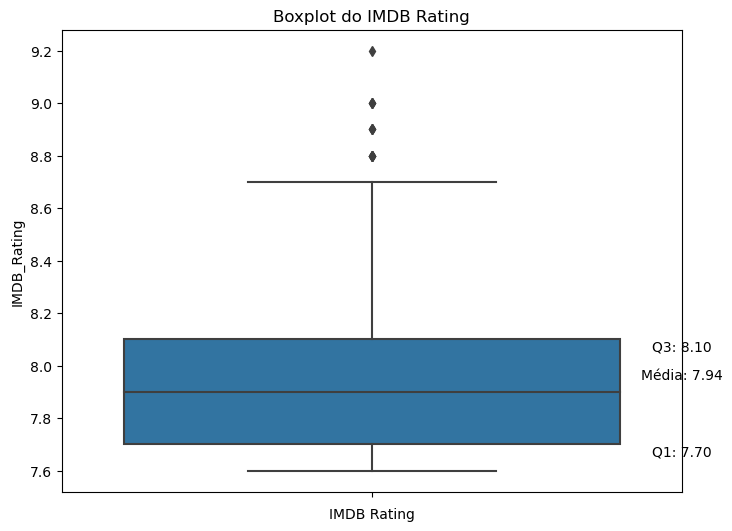

In [57]:
mean_value = df['IMDB_Rating'].mean()
q1_value = df['IMDB_Rating'].quantile(0.25)
q3_value = df['IMDB_Rating'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(y='IMDB_Rating', data=df)
plt.title('Boxplot do IMDB Rating')
plt.xlabel('IMDB Rating')

plt.text(0.5, mean_value, f'Média: {mean_value:.2f}', color='black', ha='center', va='bottom')
plt.text(0.5, q1_value, f'Q1: {q1_value:.2f}', color='black', ha='center', va='top')
plt.text(0.5, q3_value, f'Q3: {q3_value:.2f}', color='black', ha='center', va='top')

Como podemos ver na tabela e no Boxplot acima, o 3º Quartil da variável IMDB_Rating foi de 8,1.

Essa será nossa referência para a criação da coluna "IMDB_Classification".

In [59]:
df['IMDB_Classification'] = np.where(df['IMDB_Rating'] >= 8.1, 1, 0)

In [60]:
df.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_New,IMDB_Classification
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,1
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,1


In [61]:
df.tail(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_New,IMDB_Classification
993,994,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,Comedy,0
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,Drama,0


#### Elaborando o cálculo do Information Value (IV)

In [63]:
class analise_iv:
        
    def __get_tab_bivariada(self, var_escolhida):
     
        # Cria a contagem de Target_1 e Target_0
        df_aux = self.df.copy() 
        df_aux['target2'] = self.df[self.target]
        df2 = df_aux.pivot_table(values='target2',
                                 index=var_escolhida,
                                 columns=self.target,
                                 aggfunc='count')
        
        df2 = df2.rename(columns={0:'#Target_0',
                                  1:'#Target_1'})
        df2.fillna(0, inplace=True)

        # Cria as demais colunas da tabela bivariada
        df2['Total'] = (df2['#Target_0'] + df2['#Target_1'])
        df2['%Freq'] = (df2['Total'] / (df2['Total'].sum()) * 100).round(decimals=2)
        df2['%Target_1'] = (df2['#Target_1'] / (df2['#Target_1'].sum()) * 100).round(decimals=2)
        df2['%Target_0'] = (df2['#Target_0'] / (df2['#Target_0'].sum()) * 100).round(decimals=2)
        df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['%Taxa_de_Target_1'] = (df2['#Target_1'] / df2['Total'] * 100).round(decimals=2)
        df2['Odds'] = (df2['%Target_1'] / df2['%Target_0']).round(decimals=2)
        df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=2)
        df2['IV'] = (((df2['%Target_1'] / 100 - df2['%Target_0'] / 100) * df2['LN(Odds)'])).round(decimals=2)
        df2['IV'] = np.where(df2['Odds'] == 0.01, 0 , df2['IV']) 

        df2 = df2.reset_index()
        df2['Variavel'] = var_escolhida
        df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
        df2 = df2[['Variavel','Var_Range', '#Target_1','#Target_0', 'Total', '%Freq', '%Target_1', '%Target_0',
       '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]
        
        # Guarda uma cópia da tabela no histórico
        self.df_tabs_iv = pd.concat([self.df_tabs_iv, df2], axis = 0)
        
        return df2
        
    def get_bivariada(self, var_escolhida='all_vars'):
        
        if var_escolhida == 'all_vars':
                       
            #vars = self.df.drop(self.target,axis = 1).columns
            vars = self.get_lista_iv().index
            for var in vars:
                tabela = self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]
                print('==> "{}" tem IV de {}'.format(var,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]['IV'].sum().round(decimals=2)))
                # printa a tabela no Jupyter
                display(tabela)
            
            return
        
        else:
            print('==> "{}" tem IV de {}'.format(var_escolhida,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]['IV'].sum().round(decimals=2)))
            return self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]
                   
            
    def get_lista_iv(self):
        
    
        # agrupa a lista de IV's em ordem descrescente
        lista = (self.df_tabs_iv.groupby('Variavel').agg({'IV':'sum'})).sort_values(by=['IV'],ascending=False)
            
        return lista
    
    

    def __init__(self, df, target, nbins=10):

        self.df = df.copy()
        self.target = target

        #lista de variaveis numericas
        df_num = self.df.loc[:,((self.df.dtypes == 'int32') | 
                                (self.df.dtypes == 'int64') | 
                                (self.df.dtypes == 'float64')
                               )
                            ]

        vars = df_num.drop(target,axis = 1).columns

        for var in vars:
            nome_var = 'fx_' + var 
            df_num[nome_var] = pd.qcut(df_num[var], 
                                       q=nbins, 
                                       precision=2,
                                       duplicates='drop')
            df_num = df_num.drop(var, axis = 1)
            df_num = df_num.rename(columns={nome_var: var})

        #lista de variaveis qualitativas
        df_str = self.df.loc[:,((self.df.dtypes == 'object') | 
                                (self.df.dtypes == 'category') |
                                (self.df.dtypes == 'bool'))]


        self.df = pd.concat([df_num,df_str],axis = 1)


         # inicializa tab historica
        self.df_tabs_iv = pd.DataFrame()

        vars = self.df.drop(self.target,axis = 1).columns
        for var in vars:
            self.__get_tab_bivariada(var);

        # remove tabs de iv duplicadas
        self.df_tabs_iv = self.df_tabs_iv.drop_duplicates(subset=['Variavel','Var_Range'], keep='last')

In [64]:
df_iv = analise_iv(df,
                   'IMDB_Classification',
                            nbins=5)

C:\Users\mateu\AppData\Local\Temp\ipykernel_14776\1774483247.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


In [65]:
df_iv.get_bivariada(var_escolhida='Genre_New')

==> "Genre_New" tem IV de 0.11


IMDB_Classification,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Genre_New,Action,34.0,93.0,127.0,17.81,16.67,18.27,26.77,0.91,-0.09,0.00
1,Genre_New,Adventure,17.0,41.0,58.0,8.13,8.33,8.06,29.31,1.03,0.03,0.00
2,Genre_New,Animation,18.0,45.0,63.0,8.84,8.82,8.84,28.57,1.00,0.00,-0.00
3,Genre_New,Biography,17.0,56.0,73.0,10.24,8.33,11.00,23.29,0.76,-0.27,0.01
4,Genre_New,Comedy,23.0,81.0,104.0,14.59,11.27,15.91,22.12,0.71,-0.34,0.02
5,Genre_New,Crime,26.0,48.0,74.0,10.38,12.75,9.43,35.14,1.35,0.30,0.01
6,Genre_New,Drama,58.0,133.0,191.0,26.79,28.43,26.13,30.37,1.09,0.09,0.00
7,Genre_New,Family,0.0,2.0,2.0,0.28,0.00,0.39,0.00,0.01,-4.61,0.00
8,Genre_New,Film-Noir,1.0,0.0,1.0,0.14,0.49,0.01,100.00,49.00,3.89,0.02
9,Genre_New,Horror,3.0,6.0,9.0,1.26,1.47,1.18,33.33,1.25,0.22,0.00


O IV (Information Value) do Gênero do Filme transformado (coluna "Genre_New") em relação à Classificação das Notas (coluna "IMDB_Classification") foi de 0,11 o que é considerado um médio poder de separação entre as variáveis. Assim, o gênero do filme apresenta um certo poder de separação para sabermos se o filme apresentará um bom desempenho na nota que receberá.

Quando Odds da categoria de Gênero de filme é maior que 1, é sinal que temos mais chance de aquele gênero apresentar notas altas (notas posicionadas acima do 3º quartil) do que notas baixas. O gênero "Crime", por exemplo, foi responsável por 12,75% das avaliações altas e 9,43% das avaliações baixas, resultando em um Odds de 1,35. Ou seja, filmes do gênero "Crime" possum mais chance de ter notas posicionadas acima do 3º quartil do que notas posicionadas abaixo do 3º quartil.

In [67]:
df_iv.get_bivariada(var_escolhida='Certificate')

==> "Certificate" tem IV de 0.21


IMDB_Classification,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Certificate,A,65.0,108.0,173.0,24.26,31.86,21.22,37.57,1.50,0.41,0.04
1,Certificate,Approved,4.0,2.0,6.0,0.84,1.96,0.39,66.67,5.03,1.62,0.03
2,Certificate,G,3.0,6.0,9.0,1.26,1.47,1.18,33.33,1.25,0.22,0.00
3,Certificate,GP,0.0,1.0,1.0,0.14,0.00,0.20,0.00,0.01,-4.61,0.00
4,Certificate,PG,4.0,15.0,19.0,2.66,1.96,2.95,21.05,0.66,-0.42,0.00
5,Certificate,PG-13,3.0,35.0,38.0,5.33,1.47,6.88,7.89,0.21,-1.56,0.08
6,Certificate,Passed,5.0,4.0,9.0,1.26,2.45,0.79,55.56,3.10,1.13,0.02
7,Certificate,R,27.0,104.0,131.0,18.37,13.24,20.43,20.61,0.65,-0.43,0.03
8,Certificate,TV-PG,0.0,1.0,1.0,0.14,0.00,0.20,0.00,0.01,-4.61,0.00
9,Certificate,U,57.0,126.0,183.0,25.67,27.94,24.75,31.15,1.13,0.12,0.00


O IV (Information Value) da Classificação Etária (coluna "Certificate") em relação à Classificação das Notas (coluna "IMDB_Classification") foi de 0,21 o que é considerado um médio poder de separação entre as variáveis. Foi um poder de separação acima do apresentado pelo Gênero do filme. Assim, a classificação etária do filme apresenta um certo poder de separação para sabermos se o filme apresentará um bom desempenho na nota que receberá.

Quando Odds da categoria da classificação etária do filme é maior que 1, é sinal que temos mais chance de aquele gênero apresentar notas altas (notas posicionadas acima do 3º quartil) do que notas baixas. A classificação etária "U", por exemplo, foi responsável por 27,94% das avaliações altas e 24,75% das avaliações baixas, resultando em um Odds de 1,13. Ou seja, filmes da classificação etária "U" possum mais chance de ter notas posicionadas acima do 3º quartil do que notas posicionadas abaixo do 3º quartil.

In [69]:
df.describe()

,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,IMDB_Classification
count,713.000000,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02,713.000000
mean,519.300140,123.690042,7.935203,77.154278,3.533480e+05,7.858395e+07,0.286115
std,295.416331,25.896632,0.288999,12.409392,3.462212e+05,1.150433e+08,0.452261
min,1.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03,0.000000
25%,263.000000,104.000000,7.700000,70.000000,9.582600e+04,6.153939e+06,0.000000
50%,527.000000,120.000000,7.900000,78.000000,2.363110e+05,3.500000e+07,0.000000
75%,778.000000,136.000000,8.100000,86.000000,5.059180e+05,1.025158e+08,1.000000
max,997.000000,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08,1.000000


#### Elaborando o Boxplot da variável Gross

Text(0.5, 102515793.0, 'Q3: 102515793.00')

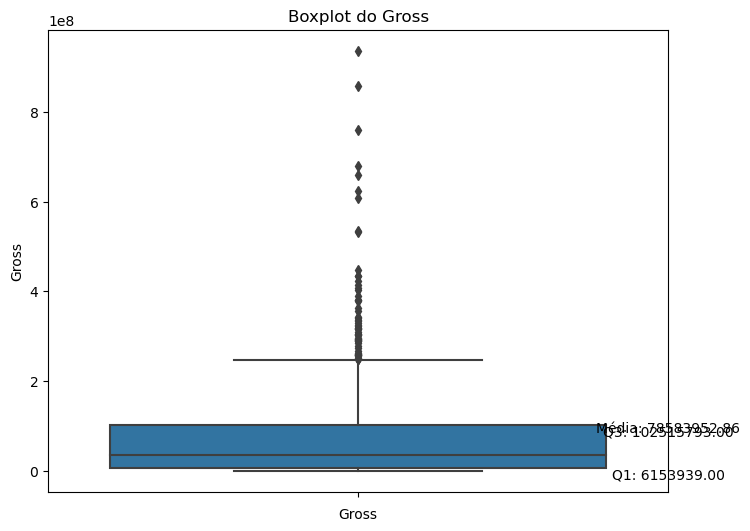

In [71]:
mean_value = df['Gross'].mean()
q1_value = df['Gross'].quantile(0.25)
q3_value = df['Gross'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(y='Gross', data=df)
plt.title('Boxplot do Gross')
plt.xlabel('Gross')

plt.text(0.5, mean_value, f'Média: {mean_value:.2f}', color='black', ha='center', va='bottom')
plt.text(0.5, q1_value, f'Q1: {q1_value:.2f}', color='black', ha='center', va='top')
plt.text(0.5, q3_value, f'Q3: {q3_value:.2f}', color='black', ha='center', va='top')

Como podemos ver na tabela e no Boxplot acima, o 3º Quartil da variável Gross foi de $ 102.515.793.

Essa será nossa referência para a criação da coluna "Gross_Classification".

In [73]:
df['Gross_Classification'] = np.where(df['Gross'] >= 102515793, 1, 0)

In [74]:
df.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_New,IMDB_Classification,Gross_Classification
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,1,1
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,1,1


In [75]:
df_iv_gross = analise_iv(df,
                   'Gross_Classification',
                            nbins=5)

C:\Users\mateu\AppData\Local\Temp\ipykernel_14776\1774483247.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


In [76]:
df_iv_gross.get_bivariada(var_escolhida='Genre_New')

==> "Genre_New" tem IV de 0.59


Gross_Classification,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Genre_New,Action,60.0,67.0,127.0,17.81,33.52,12.55,47.24,2.67,0.98,0.21
1,Genre_New,Adventure,18.0,40.0,58.0,8.13,10.06,7.49,31.03,1.34,0.29,0.01
2,Genre_New,Animation,31.0,32.0,63.0,8.84,17.32,5.99,49.21,2.89,1.06,0.12
3,Genre_New,Biography,14.0,59.0,73.0,10.24,7.82,11.05,19.18,0.71,-0.34,0.01
4,Genre_New,Comedy,11.0,93.0,104.0,14.59,6.15,17.42,10.58,0.35,-1.05,0.12
5,Genre_New,Crime,9.0,65.0,74.0,10.38,5.03,12.17,12.16,0.41,-0.89,0.06
6,Genre_New,Drama,32.0,159.0,191.0,26.79,17.88,29.78,16.75,0.60,-0.51,0.06
7,Genre_New,Family,1.0,1.0,2.0,0.28,0.56,0.19,50.00,2.95,1.08,0.00
8,Genre_New,Film-Noir,0.0,1.0,1.0,0.14,0.00,0.19,0.00,0.01,-4.61,0.00
9,Genre_New,Horror,2.0,7.0,9.0,1.26,1.12,1.31,22.22,0.85,-0.16,0.00


O IV (Information Value) do Gênero do Filme transformado (coluna "Genre_New") em relação ao Faturamento transformado (coluna "Gross_Classification") foi de 0,59 o que é considerado um forte poder de separação entre as variáveis. Assim, o gênero do filme apresenta um alto poder de separação para sabermos se o filme apresentará um alto faturamento.

Quando o Odds da categoria de Gênero de filme é maior que 1, é sinal que temos mais chance de aquele gênero apresentar alto faturamento (faturamento posicionado acima do 3º quartil) do que baixo faturamento.

O gênero "Action", por exemplo, foi responsável por 33,52% do total de filmes com alto faturamento e por 12,55% do total de filmes com baixo faturamento, resultando em um Odds de 2,67. Ou seja, filmes do gênero "Action" possuem mais chance de ter um faturamento posicionado acima do 3º quartil do que um faturamento posicionado abaixo do 3º quartil.

Por outro lado, o gênero "Drama", por exemplo, foi responsável por 17,88% do total de filmes com alto faturamento e por 29,78% do total de filmes com baixo faturamento, resultando em um Odds de 0,60. Ou seja, filmes do gênero "Drama" possuem mais chance de ter um faturamento posicionado abaixo do 3º quartil do que um faturamento posicionado acima do 3º quartil.

In [78]:
df_iv_gross.get_bivariada(var_escolhida='Certificate')

==> "Certificate" tem IV de 0.58


Gross_Classification,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Certificate,A,43.0,130.0,173.0,24.26,24.02,24.34,24.86,0.99,-0.01,0.00
1,Certificate,Approved,0.0,6.0,6.0,0.84,0.00,1.12,0.00,0.01,-4.61,0.00
2,Certificate,G,1.0,8.0,9.0,1.26,0.56,1.50,11.11,0.37,-0.99,0.01
3,Certificate,GP,0.0,1.0,1.0,0.14,0.00,0.19,0.00,0.01,-4.61,0.00
4,Certificate,PG,0.0,19.0,19.0,2.66,0.00,3.56,0.00,0.01,-4.61,0.00
5,Certificate,PG-13,4.0,34.0,38.0,5.33,2.23,6.37,10.53,0.35,-1.05,0.04
6,Certificate,Passed,0.0,9.0,9.0,1.26,0.00,1.69,0.00,0.01,-4.61,0.00
7,Certificate,R,8.0,123.0,131.0,18.37,4.47,23.03,6.11,0.19,-1.66,0.31
8,Certificate,TV-PG,0.0,1.0,1.0,0.14,0.00,0.19,0.00,0.01,-4.61,0.00
9,Certificate,U,59.0,124.0,183.0,25.67,32.96,23.22,32.24,1.42,0.35,0.03


O IV (Information Value) da Classificação Etária (coluna "Certificate") em relação ao Faturamento transformado (coluna "Gross_Classification") foi de 0,58 o que é considerado um forte poder de separação entre as variáveis. Assim, a classificação etária apresenta um alto poder de separação para sabermos se o filme apresentará um alto faturamento.

Quando o Odds da categoria de Classificação Etária de filme é maior que 1, é sinal que temos mais chance de aquele gênero apresentar alto faturamento (faturamento posicionado acima do 3º quartil) do que baixo faturamento.

A Classificação Etária "U", por exemplo, foi responsável por 32,96% do total de filmes com alto faturamento e por 23,22% do total de filmes com baixo faturamento, resultando em um Odds de 1,42. Ou seja, filmes da Classificação Etária "U" possuem mais chance de ter um faturamento posicionado acima do 3º quartil do que um faturamento posicionado abaixo do 3º quartil.

Por outro lado, a Classificação Etária "R", por exemplo, foi responsável por 4,47% do total de filmes com alto faturamento e por 23,03% do total de filmes com baixo faturamento, resultando em um Odds de 0,19. Ou seja, filmes da classificação etária "R" possuem mais chance de ter um faturamento posicionado abaixo do 3º quartil do que um faturamento posicionado acima do 3º quartil.

### Qual filme recomendar para uma pessoa desconhecida (Questão 2A)

Partindo do pressuposto da Teoria Frequentista, o filme que indicarei para uma pessoa desconhecida levará em consideração a popularidade daquele filme expressa pela quantidade de votos que ele recebeu. Ou seja, um filme com muitos votos reflete a atenção que as pessoas estão depositando sobre ele. E também levarei em consideração a qualidade do filme, expressa pela nota que o filme recebeu.

Assim, irei filtrar a base de dados com os 10 filmes com a maior quantidade de votos.

E, destes 10 filmes, irei filtrar aquele que apresentar a maior nota.

In [82]:
# Ordenando o dataframe pelos números de votos em ordem decrescente
df_ordenado = df.sort_values(by='No_of_Votes', ascending=False)

# Selecionando os 10 filmes com os maiores números de votos
top_10_votos = df_ordenado.head(10)

# Encontrando o índice do filme com maior nota nos 10 primeiros
ind_top_10 = top_10_votos['IMDB_Rating'].idxmax()

# Acessando o título do filme com a maior nota entre os 10 primeiros
filme_maior_nota_top_10 = top_10_votos.loc[ind_top_10, 'Series_Title']
maior_nota = top_10_votos.loc[ind_top_10, 'IMDB_Rating']

# Resultado
print(f"Filme com a maior nota entre os 10 filmes com mais votos: {filme_maior_nota_top_10} (Rating: {maior_nota})")

Filme com a maior nota entre os 10 filmes com mais votos: The Godfather (Rating: 9.2)


Assim, o filme que eu recomendaria para uma pessoa desconhecida seria o **The Godfather**, que entre os 10 filmes com mais votos, foi o que apresentou a melhor nota (9,2)

### Principais fatores relacionados com a alta expectativa de faturamento de um filme (Questão 2B)

Como estamos falando em **expectativa** de faturamento, não faz muito sentido considerarmos fatores como quantidade de votos, nota do IMDB e média ponderada das críticas, que ocorrem a posteriori do lançamento do filme. 

Como apresentado na Análise Exploratória de Dados acima, a variável quantitativa restante, Runtime, apresenta fraca Correlação com o Faturamento (Correlação de 0,17). Então essa variável não está fortemente relacionada com alta (ou baixa) expectativa de faturamento.

Já a variável qualitativa Certificate apresentou alto Information Value (IV) em relação ao Faturamento (IV de 0,58). Assim, filmes de classificação etária como o "U" e "UA" possuem mais alta probabilidade de apresentarem alto faturamento se comparadas com outras categorias de classificação etária.

E a variável qualitativa Gênero (coluna "Genre_New")  apresentou alto Information Value (IV) em relação ao Faturamento (IV de 0,59). Assim, filmes do gênero "Animation" e "Action" possuem mais alta probabilidade de apresentarem alto faturamento se comparadas com outros gêneros.

## Desenvolvimento do Modelo - Questão 3

Os modelos que serão treinados e avaliados pretendem estimar a nota do IMDB. Como o Target é um valor numérico, trata-se de um problema de regressão. Entretanto, iremos usar a estratégia comum de transformar um problema de regressão em um problema de classificação. 

Assim como tratado na Análise Exploratória de Dados (EDA), vamos considerar que notas do IMDB maiores ou iguais a 8,1 serão classificadas como 1 e notas abaixo de 8,1 serão classificadas como 0. Ou seja, o nosso Target será a coluna "IMDB_Classification".


Nós iremos utilizar a estratégia de transformar um problema de regressão em um problema de classificação porque os modelos de classificação apresentam mais métricas de performance.

### Definição do *Target* e das *Features*

In [89]:
# Target (variável resposta)

y = df['IMDB_Classification']

In [90]:
# Features (variáveis explicativas)
x_var = [
    'Certificate', 'Runtime', 'Genre_New', 'Meta_score', 'No_of_Votes',
    'Gross'
    ]
x = pd.get_dummies(df[x_var], drop_first=True)

In [91]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: IMDB_Classification, dtype: int32

In [92]:
x.head()

,Runtime,Meta_score,No_of_Votes,Gross,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,...,Genre_New_Animation,Genre_New_Biography,Genre_New_Comedy,Genre_New_Crime,Genre_New_Drama,Genre_New_Family,Genre_New_Film-Noir,Genre_New_Horror,Genre_New_Mystery,Genre_New_Western
0,175,100.0,1620367,134966411.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,152,84.0,2303232,534858444.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,202,90.0,1129952,57300000.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,96,96.0,689845,4360000.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,201,94.0,1642758,377845905.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Divisão das bases em Treino e Teste

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [95]:
x_train.shape

(499, 26)

In [96]:
x_test.shape

(214, 26)

### Importando Bibliotecas e Métricas de Desempenho

In [98]:
import pandas as pd
import numpy as np
from IPython.display import display
from ydata_profiling import ProfileReport
import sweetviz as sv
# Métricas de Desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp
# Função para cálculo do KS
def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y==1], y_pred[y!=1]).statistic
# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):
    
    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]

    ypred_test = modelo.predict(x_test)
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)
    
    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)
    
    ks_train = ks_stat(y_train, ypred_proba_train)
    ks_test = ks_stat(y_test, ypred_proba_test)
    
    prec_train = precision_score(y_train, ypred_train, zero_division=0)
    prec_test = precision_score(y_test, ypred_test, zero_division=0)
    
    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)
    
    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, ks_train, 
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, ks_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','KS',
                                   'Precision','Recall','F1'])
    
    df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)
    
    return df_desemp

### Criando o nosso Modelo Base-Line:

### Modelo individual: Regressão Logística

In [101]:
# Definição do modelo
modelo_rl = LogisticRegression(max_iter=1000)

# Ajuste do Modelo
modelo_rl.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [102]:
desemp_rl=calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

desemp_rl

,Treino,Teste,Variação
Acurácia,0.571142,0.560748,-0.02
AUROC,0.748136,0.722093,-0.03
KS,0.469503,0.462649,-0.01
Precision,0.377551,0.370968,-0.02
Recall,0.781690,0.741935,-0.05
F1,0.509174,0.494624,-0.03


In [103]:
percentual_0s = (df['IMDB_Classification'] == 0).mean() * 100

print(f"Participação percentual de 0s na coluna IMDB_Classification: {percentual_0s:.2f}%")

Participação percentual de 0s na coluna IMDB_Classification: 71.39%


Como podemos verificar acima, que 71,39% das observações da coluna IMDB_Classification são do tipo 0 (Nota abaixo de 8,1).

Ou seja, essa base é desbalanceada. Para bases desbalanceadas, a Acurácia não é uma métrica de desempenho muito boa porque, neste tipo de base, a maioria das instâncias pertence a uma classe majoritária, enquanto uma minoria pertence a uma classe minoritária. Então, se um modelo simplesmente predizer a classe majoritária para todas as instâncias, ele ainda pode obter uma alta Acurácia. Isso ocorre porque a maioria das previsões estará correta apenas devido à predominância da classe majoritária, ignorando completamente a classe minoritária. 

Ex: uma base de dados com 1000 instâncias, das quais 950 pertencem à classe majoritária (classe 0) e 50 pertencem à classe minoritária (classe 1).
Um modelo que prediz sempre a classe 0 terá uma acurácia de 95% (950/1000), mesmo que ele nunca consiga prever corretamente a classe 1.
Essa acurácia de 95% pode parecer muito boa à primeira vista, mas o modelo não tem utilidade prática porque falha completamente em identificar a classe minoritária.

Na base em questão, se montarmos um modelo de classificação que estima todas as instâncias como sendo do tipo 0, já teríamos uma Acurácia de 71,39%. Então, iremos olhar com mais ênfase as outras métricas de desempenho

### Módelo Individual - Árvore de Decisão (Decision Tree)

In [106]:
modelo_dt = DecisionTreeClassifier(min_samples_leaf=5,
                                     max_depth=3,
                                     random_state=42)

In [107]:
modelo_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [108]:
desemp_dt=calcula_desempenho(modelo_dt, x_train, y_train, x_test, y_test)

desemp_dt

,Treino,Teste,Variação
Acurácia,0.845691,0.775701,-0.08
AUROC,0.820028,0.753608,-0.08
KS,0.503196,0.426995,-0.15
Precision,0.891566,0.694444,-0.22
Recall,0.521127,0.403226,-0.23
F1,0.657778,0.510204,-0.22


### Ensemble: *Bagging de Regressão Logística*

Para criar um Bagging mais geral, primeiro precisamos criar um modelo base. Nesse caso, estamos escolhendo uma Regressão Logística. Ele está sendo nomeado como "modelo_base", na célula abaixo.
Não estamos usando o fit. Estamos apenas estanciando e criando esse objeto da classe LogisticRegression

In [111]:
# Inicia o estimador base para o Bagging
modelo_base = LogisticRegression(max_iter=1000)

Na célula abaixo, estamos definindo que a quantidade de estimadores que estamos escolhendo é 100. Ou seja, serão criados 100 modelos de Regressão Logística. E cada um desses modelos irá olhar para uma base diferente, seja em termos de observações, seja em termos de features. Assim, cada modelo terá uma visão diferente do conjunto de dados

In [113]:
num_estimadores = 100

O argumento "max_samples" é o nº de amostras que o Bagging vai sortear do X, para fazer o treinamento de cada estimador base.


O default do argumento "max_samples" é 1. Ou seja, sortear 100% sempre. Isso perde um pouco a motivação de usar uma modelo de Bagging.


Assim, estamos considerando que o argumento "max_samples" será de 50%. Ou seja, cada modelo terá 50% da base em termos de observações para fazer o treinamento.


Na documentação do BaggingClassifier, no argumento "max_samples" é informado que há reposição de observações entre os modelos. Se não houvesse, não seria um modelo de bagging, e sim de pasting.

O argumento max_features é o nº de features que serão sorteadas do x para treinar cada estimador base. O default desse argumento é 1. Ou seja, ele vai sorter todas as features. Também vamos considerar 50% para esse argumento. Ou seja, cada modelo irá considerar metade das features que estão disponíveis.

Modelos de Bagging permitem paralelização (processos simultâneos independentes). No argumento n_jobs iremos considerar -1. O -1 irá fazer com que o computador utilize todos os seus cores (independentemente da quantidade de cores que cada computador tiver).

In [115]:
# Classificador de Bagging
from sklearn.ensemble import BaggingClassifier

modelo_bagging = BaggingClassifier(estimator = modelo_base, 
                                   n_estimators = num_estimadores, 
                                   max_samples=0.5,
                                   max_features=0.5,
                                   random_state = 42, 
                                   n_jobs=-1) 

In [116]:
# Ajuste do Modelo
modelo_bagging.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_features=0.5,
                  max_samples=0.5, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [117]:
desemp_bagging=calcula_desempenho(modelo_bagging, x_train, y_train, x_test, y_test)

desemp_bagging

,Treino,Teste,Variação
Acurácia,0.783567,0.771028,-0.02
AUROC,0.819071,0.772814,-0.06
KS,0.546159,0.529075,-0.03
Precision,0.947368,1.000000,0.06
Recall,0.253521,0.209677,-0.17
F1,0.400000,0.346667,-0.13


### Ensemble: *Bagging Random Forest*

O modelo de Bagging que utiliza Árvores de Decisão é o modelo conhecido como Random Forest (Floresta Aleatória).


Iremos utilizar o RandomForestClassifier. Muitos dos seus argumentos são os mesmos argumentos do algoritmo de Árvore de Decisão. 


O que há de diferente no algoritmo de Random Forest em relação ao algoritmo de Árvore de Decisão é o fato de, no RandomForestClassifier, nós termos um argumento de número de estimadores, que é o argumento em que informamos quantas Árvores de Decisão serão treinadas para fazer as estimativas.

In [120]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, 
                                   min_samples_leaf=10, 
                                   max_depth=3,
                                   random_state = 42)

In [121]:
modelo_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [122]:
desemp_rf = calcula_desempenho(modelo_rf, x_train, y_train, x_test, y_test)

desemp_rf

,Treino,Teste,Variação
Acurácia,0.803607,0.789720,-0.02
AUROC,0.870419,0.818230,-0.06
KS,0.592417,0.512309,-0.14
Precision,0.892857,0.814815,-0.09
Recall,0.352113,0.354839,0.01
F1,0.505051,0.494382,-0.02


### Ensemble: *Boosting* - **AdaBoost**

In [124]:
modelo_ada = AdaBoostClassifier(n_estimators=50,
                                learning_rate = 0.6,
                                random_state = 42)

In [125]:
# Ajuste do Modelo
modelo_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.6, random_state=42)

In [126]:
desemp_ada = calcula_desempenho(modelo_ada,
                                x_train, y_train,x_test, y_test)
desemp_ada

,Treino,Teste,Variação
Acurácia,0.873747,0.822430,-0.06
AUROC,0.950872,0.862320,-0.09
KS,0.772557,0.590620,-0.24
Precision,0.862385,0.750000,-0.13
Recall,0.661972,0.580645,-0.12
F1,0.749004,0.654545,-0.13


### Ensemble: *Boosting* - **Gradient Boosting**

O Gradient Boosting também é baseado em Árvore de Decisão. Por isso que muitos argumentos do método GradientBoostingClassifier são argumentos de Árvores de Decisão.

O argumento subsample tem como padrão 1. Ele vai definir quanto que cada modelo terá da base para ser treinado. Neste exemplo usaremos 0.2.

In [129]:
modelo_gb = GradientBoostingClassifier(n_estimators=100,
                                       learning_rate = 0.4,
                                       subsample=0.2,
                                       min_samples_leaf=10,
                                       max_depth=2,
                                       random_state = 42)

In [130]:
# Ajuste do modelo
modelo_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=2, min_samples_leaf=10,
                           random_state=42, subsample=0.2)

In [131]:
# Métricas de Desempenho
desemp_gb = calcula_desempenho(modelo_gb, x_train, y_train, x_test, y_test)
desemp_gb

,Treino,Teste,Variação
Acurácia,0.879760,0.789720,-0.10
AUROC,0.943563,0.829160,-0.12
KS,0.737188,0.511036,-0.31
Precision,0.810606,0.660377,-0.19
Recall,0.753521,0.564516,-0.25
F1,0.781022,0.608696,-0.22


### Comparação dos Modelos

In [133]:
desemp_rl

,Treino,Teste,Variação
Acurácia,0.571142,0.560748,-0.02
AUROC,0.748136,0.722093,-0.03
KS,0.469503,0.462649,-0.01
Precision,0.377551,0.370968,-0.02
Recall,0.781690,0.741935,-0.05
F1,0.509174,0.494624,-0.03


In [134]:
desemp_dt

,Treino,Teste,Variação
Acurácia,0.845691,0.775701,-0.08
AUROC,0.820028,0.753608,-0.08
KS,0.503196,0.426995,-0.15
Precision,0.891566,0.694444,-0.22
Recall,0.521127,0.403226,-0.23
F1,0.657778,0.510204,-0.22


In [135]:
desemp_bagging

,Treino,Teste,Variação
Acurácia,0.783567,0.771028,-0.02
AUROC,0.819071,0.772814,-0.06
KS,0.546159,0.529075,-0.03
Precision,0.947368,1.000000,0.06
Recall,0.253521,0.209677,-0.17
F1,0.400000,0.346667,-0.13


In [136]:
desemp_rf

,Treino,Teste,Variação
Acurácia,0.803607,0.789720,-0.02
AUROC,0.870419,0.818230,-0.06
KS,0.592417,0.512309,-0.14
Precision,0.892857,0.814815,-0.09
Recall,0.352113,0.354839,0.01
F1,0.505051,0.494382,-0.02


In [137]:
desemp_ada

,Treino,Teste,Variação
Acurácia,0.873747,0.822430,-0.06
AUROC,0.950872,0.862320,-0.09
KS,0.772557,0.590620,-0.24
Precision,0.862385,0.750000,-0.13
Recall,0.661972,0.580645,-0.12
F1,0.749004,0.654545,-0.13


In [138]:
desemp_gb

,Treino,Teste,Variação
Acurácia,0.879760,0.789720,-0.10
AUROC,0.943563,0.829160,-0.12
KS,0.737188,0.511036,-0.31
Precision,0.810606,0.660377,-0.19
Recall,0.753521,0.564516,-0.25
F1,0.781022,0.608696,-0.22


### Medida a ser escolhida para avaliação do desempenho dos modelos

Uma vez que estamos na posição de orientar qual o próximo filme que será produzido, uma boa medida de avaliação do desempenho dos modelos poderia ser o Precision. O Precision mediria o percentual da quantidade de filmes que o modelo prevê como boa nota no IMDB que de fato tiveram boa nota no IMDB. Ou seja, quanto mais alto fosse o Precision, menor seria a probabilidade de indicarmos um filme que acreditamos, pelo modelo, que seria bem avaliado e ele, de fato, ser mal avaliado. Ou seja, deixaríamos de propor a produção de um filme, ser gasto dinheiro na sua produção, e ele ser mal avaliado. 

Como a produção de um filme envolve muito dinheiro, a medida de perfomance Precision seria mais indicada que a medida Recall. O Recall iria nos mostrar o percentual da quantidade de filmes que de fato foram bem avaliados em relação a quantidade de filmes que o modelo previu que seriam bem avaliados. 

Ou seja, quanto mais alto o Precision, menor a probabilidade de indicarmos a produção de um filme que será mal avaliado.
E quanto maior o Recall, menor a probabilidade de deixarmos de indicar a produção de um filme que será bem avaliado.

Entretanto, **iremos usar a medida AUROC** para avaliar a performance dos modelos, pois ela é uma medida que sintetizará o desempenho dos acertos do modelo. Quanto mais alto for o AUROC, maiores serão os Verdadeiros Positivos (TP: Modelo previu que o filme será bem avaliado e ele, de fato, é bem avaliado) e Verdadeiros Negativos (TN: Modelo prevê que o filme será mal avaliado e ele, de fato, é mal avaliado) e menores serão os Falsos Positivos (FP: Modelo prevê que o filme será bem avaliado mas ele, de fato, é mal avaliado) e Falsos Negativos (FN: Modelo prevê que o filme será mal avaliado mas ele, de fato, é bem avaliado).

## Tunagem de Hiperparâmetros

Ao avaliarmos os 6 modelos elaborados acima (Regressão Logística, Árvore de Decisão, Bagging de Regressão Logística, Random Forest, AdaBoost e Gradient Boosting), verificamos que **os 2 modelos que apresentaram as maiores medidas AUROC na base de Teste foram o AdaBoost e o Gradient Boosting**. E verifamos que não há uma perda muito significativa de desempenho entre a base de Treino e a base de Teste, o que denota que os modelos não estão apresentando overfitting.

Agora iremos realizar a tunagem de Hiperparâmetros desses dois modelos, afim de aumentar ainda mais o desempenho desses dois modelos, tomando a medida AUROC como referência. Ou seja, iremos buscar a configuração de Hiperparâmetros de cada um desses dois modelos que otimize a medida de perfomance AUROC.

**Para tunar os Hiperparâmetros iremos utilizar metodologia Bayesian Search**, que é mais performática que a metodologia Grid Search.

In [143]:
# Importando as bibliotecas
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
import optuna
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

### Tunagem dos Hiperparâmetros do modelo AdaBoost

In [145]:
# Definindo nossa função objetivo
def objective(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01,0.99)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo = AdaBoostClassifier(n_estimators = n_estimators, learning_rate = learning_rate, random_state = 42)
    score = cross_val_score(estimator = modelo, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = roc_auc_scorer).mean()
    return score

# Criando o estudo do Optuna e buscando os melhores parâmetros
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params = study.best_params
print(best_params)

[I 2024-07-16 15:06:10,490] A new study created in memory with name: no-name-4c815de5-751b-40c3-8dc6-69f3af0806b5
[I 2024-07-16 15:06:11,656] Trial 0 finished with value: 0.8268147684605758 and parameters: {'n_estimators': 186, 'learning_rate': 0.602211615621923}. Best is trial 0 with value: 0.8268147684605758.
[I 2024-07-16 15:06:13,344] Trial 1 finished with value: 0.8436227327810557 and parameters: {'n_estimators': 390, 'learning_rate': 0.24340146305149452}. Best is trial 1 with value: 0.8436227327810557.
[I 2024-07-16 15:06:15,583] Trial 2 finished with value: 0.8314150128136361 and parameters: {'n_estimators': 478, 'learning_rate': 0.45065502607488556}. Best is trial 1 with value: 0.8436227327810557.
[I 2024-07-16 15:06:16,051] Trial 3 finished with value: 0.8409197012138189 and parameters: {'n_estimators': 143, 'learning_rate': 0.4058050678708481}. Best is trial 1 with value: 0.8436227327810557.
[I 2024-07-16 15:06:17,224] Trial 4 finished with value: 0.8123199634463716 and param

{'n_estimators': 258, 'learning_rate': 0.11855396042600441}


In [146]:
# Avaliando o modelo com os melhores parâmetros 
modelo_ada_tunado = AdaBoostClassifier(**best_params, random_state = 42)
modelo_ada_tunado.fit(x_train, y_train)
y_pred_proba = modelo_ada_tunado.predict_proba(x_test)[:, 1]
roc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC: {roc:.4f}")

ROC: 0.8682


In [147]:
desemp_ada_tunado=calcula_desempenho(modelo_ada_tunado, x_train, y_train, x_test, y_test)

desemp_ada_tunado

,Treino,Teste,Variação
Acurácia,0.875752,0.817757,-0.07
AUROC,0.950635,0.868209,-0.09
KS,0.756953,0.604202,-0.20
Precision,0.892157,0.734694,-0.18
Recall,0.640845,0.580645,-0.09
F1,0.745902,0.648649,-0.13


### Tunagem dos Hiperparâmetros do modelo Gradient Boosting

In [149]:
# Definindo nossa função objetivo
def objective(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01,0.99)
    subsample = trial.suggest_float('subsample', 0.1, 1, step = 0.1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 15)
    max_depth = trial.suggest_int('max_depth', 2, 5)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, subsample= subsample, min_samples_leaf= min_samples_leaf, max_depth = max_depth, random_state = 42)
    score = cross_val_score(estimator = modelo, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = roc_auc_scorer).mean()
    return score

# Criando o estudo do Optuna e buscando os melhores parâmetros
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params = study.best_params
print(best_params)

[I 2024-07-16 15:07:34,221] A new study created in memory with name: no-name-ce28a510-9a3d-4d71-b3c5-3158912702a9
[I 2024-07-16 15:07:34,437] Trial 0 finished with value: 0.844395027514552 and parameters: {'n_estimators': 73, 'learning_rate': 0.5905324110271619, 'subsample': 0.8, 'min_samples_leaf': 5, 'max_depth': 2}. Best is trial 0 with value: 0.844395027514552.
[I 2024-07-16 15:07:35,950] Trial 1 finished with value: 0.8523278105568468 and parameters: {'n_estimators': 451, 'learning_rate': 0.10321098205889392, 'subsample': 0.7000000000000001, 'min_samples_leaf': 12, 'max_depth': 5}. Best is trial 1 with value: 0.8523278105568468.
[I 2024-07-16 15:07:36,376] Trial 2 finished with value: 0.8462922403003755 and parameters: {'n_estimators': 203, 'learning_rate': 0.7607675219980904, 'subsample': 0.8, 'min_samples_leaf': 10, 'max_depth': 2}. Best is trial 1 with value: 0.8523278105568468.
[I 2024-07-16 15:07:36,527] Trial 3 finished with value: 0.8197560939269325 and parameters: {'n_esti

{'n_estimators': 234, 'learning_rate': 0.04028597459008615, 'subsample': 0.2, 'min_samples_leaf': 12, 'max_depth': 3}


In [150]:
# Avaliando o modelo com os melhores parâmetros 
modelo_gb_tunado = GradientBoostingClassifier(**best_params, random_state = 42)
modelo_gb_tunado.fit(x_train, y_train)
y_pred_proba = modelo_gb_tunado.predict_proba(x_test)[:, 1]
roc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC: {roc:.4f}")

ROC: 0.8853


In [151]:
desemp_gb_tunado=calcula_desempenho(modelo_gb_tunado, x_train, y_train, x_test, y_test)

desemp_gb_tunado

,Treino,Teste,Variação
Acurácia,0.905812,0.859813,-0.05
AUROC,0.953426,0.885293,-0.07
KS,0.783525,0.631791,-0.19
Precision,0.880000,0.796296,-0.10
Recall,0.774648,0.693548,-0.10
F1,0.823970,0.741379,-0.10


### Comparando os dois modelos tunados

In [153]:
desemp_ada_tunado

,Treino,Teste,Variação
Acurácia,0.875752,0.817757,-0.07
AUROC,0.950635,0.868209,-0.09
KS,0.756953,0.604202,-0.20
Precision,0.892157,0.734694,-0.18
Recall,0.640845,0.580645,-0.09
F1,0.745902,0.648649,-0.13


In [154]:
desemp_gb_tunado

,Treino,Teste,Variação
Acurácia,0.905812,0.859813,-0.05
AUROC,0.953426,0.885293,-0.07
KS,0.783525,0.631791,-0.19
Precision,0.880000,0.796296,-0.10
Recall,0.774648,0.693548,-0.10
F1,0.823970,0.741379,-0.10


Após a tunagem dos Hiperparâmetos, o modelo com a **melhor performance** na base de teste, considerando a medida AUROC como referência, foi o modelo **Gradient Boosting**. Ele apresentou uma performance melhor que a do modelo AdaBoost na base de teste e também melhor capacidade de generalização.